In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from image_helpers import *
from classification import *
from SVM_model import SVM
%load_ext autoreload
%autoreload 2

In [2]:
#Global variables
image_dir = "../training/images/"
gt_dir = "../training/groundtruth/"
files = os.listdir(image_dir)

patch_size = 16
foreground_threshold = 0.25

In [3]:
# Loading a set of images with their groundtruth
imgs, gt_imgs = load_n_images_groundtruth(image_dir, gt_dir, 100)
# Load SVM model
model = SVM(patch_size, foreground_threshold)

In [4]:
model.train(gt_imgs, imgs)

Training...
yo
Accuracy=0.79104


Classifying...
yo


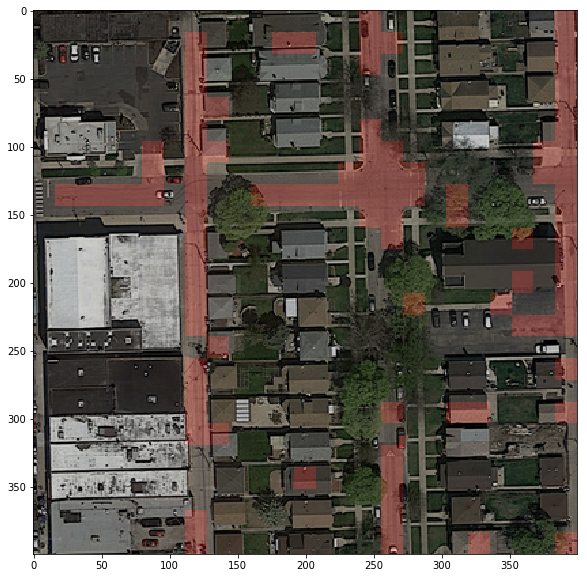

In [5]:
#Predict and Display image
img_idx = 60
predict_and_display_image(model, image_dir + files[img_idx], gt_imgs[img_idx], imgs[img_idx])

In [37]:
from classification import predict_test_set_images
predict_test_set_images('prediction.csv', model)

Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
Classifying...
